In [1]:
import unicodecsv

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

enrollments = read_csv('enrollments.csv')
daily_engagement = read_csv('daily_engagement.csv')
project_submissions = read_csv('project_submissions.csv')
    
### For each of these three tables, find the number of rows in the table and
### the number of unique students in the table. To find the number of unique
### students, you might want to create a set of the account keys in each table.

In [2]:
#Fixing Data Types in the enrollment, engagement and submissions table:

In [3]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [4]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [5]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

In [6]:
for engagement_record in daily_engagement:#遍历daily_engagement表
    engagement_record['account_key'] = engagement_record['acct']#针对每一行创建新的account_key,并设置等于key键acct储存的值
    del[engagement_record['acct']]
    

In [7]:
def get_unique_students(data):
    unique_students = set()
    for data_point in data:
        unique_students.add(data_point['account_key'])
    return unique_students

In [8]:
len(enrollments)

1640

In [9]:
len(daily_engagement)

136240

In [10]:
len(project_submissions)

3642

In [11]:
unique_enrolled_students = set()
for enrollment in enrollments:
    unique_enrolled_students.add(enrollment['account_key'])
len(unique_enrolled_students)

1302

In [12]:
#调用def get_unique_students(data) 函数
#data = enrollments
unique_enrolled_students = get_unique_students(enrollments)
len(unique_enrolled_students)

1302

In [13]:
unique_engagement_students = set()
for engagement_record in daily_engagement:
    unique_engagement_students.add(engagement_record['account_key'])
len(unique_engagement_students)

1237

In [14]:
#调用def get_unique_students(data) 函数
#data = daily_engagement
unique_engagement_students = get_unique_students(daily_engagement)
len(unique_engagement_students)

1237

In [15]:
unique_project_submitters = set()
for submission in project_submissions:
    unique_project_submitters.add(submission['account_key'])
len(unique_project_submitters)

743

In [16]:
#调用def get_unique_students(data) 函数
#data = project_submissions
unique_engagement_students = get_unique_students(project_submissions)
len(unique_project_submitters)

743

In [17]:
daily_engagement[0]['account_key']

u'0'

In [18]:
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students:
        print enrollment
        break

{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 10, 0, 0), u'account_key': u'700', u'cancel_date': datetime.datetime(2014, 11, 16, 0, 0), u'days_to_cancel': 6}


In [19]:
num_problem_students = 0
for enrollment in enrollments:
    student = enrollment['account_key']
    if (student not in unique_engagement_students and 
            enrollment['join_date'] != enrollment['cancel_date']):
    
        num_problem_students += 1

num_problem_students

602

In [20]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [21]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [22]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


In [23]:
paid_students = {}
for enrollment in non_udacity_enrollments:
    if (not enrollment['is_canceled'] or enrollment['days_to_cancel'] > 7):
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        if (account_key not in paid_students or
                enrollment_date > paid_students[account_key]):
            paid_students[account_key] = enrollment_date
len(paid_students)

995

In [24]:
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [25]:
def remove_free_trail_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

In [26]:
paid_enrollments = remove_free_trail_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trail_cancels(non_udacity_engagement)
paid_submissions = remove_free_trail_cancels(non_udacity_submissions)

print len(paid_enrollments)
print len(paid_engagement)
print len(paid_submissions)

1293
134549
3618


In [27]:
for engagement_record in paid_engagement:
    if engagement_record['num_courses_visited'] > 0:
        engagement_record['has_visited'] = 1
    else:
        engagement_record['has_visited'] = 0

In [28]:
paid_engagement_in_first_week = []
for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = engagement_record['utc_date']
    
    if within_one_week(join_date, engagement_record_date):
        paid_engagement_in_first_week.append(engagement_record)
len(paid_engagement_in_first_week)

6919

In [29]:
from collections import defaultdict

engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [30]:
total_minutes_by_account = {}

for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes


In [31]:
total_minutes = total_minutes_by_account.values()
import numpy as np
print 'Mean:', np.mean(total_minutes)
print 'SD:', np.std(total_minutes)
print 'Max:', np.max(total_minutes)
print 'Min:', np.min(total_minutes)

Mean: 306.70832675342825
SD: 412.99693340852957
Max: 3564.7332644989997
Min: 0.0


In [32]:
student_with_max_minutes = None
max_minutes = 0
for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        student_with_max_minutes = student
max_minutes

3564.7332644989997

In [33]:
for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_minutes:
        print engagement_record

{u'lessons_completed': 4, u'num_courses_visited': 4, 'has_visited': 1, u'total_minutes_visited': 850.519339666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 9, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 6, 'has_visited': 1, u'total_minutes_visited': 872.633923334, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 10, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 2, 'has_visited': 1, u'total_minutes_visited': 777.018903666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 11, 0, 0)}
{u'lessons_completed': 2, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 294.568774, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 12, 0, 0)}
{u'lessons_completed': 1, u'num_courses_visited': 3, 'has_visited': 1, u'total_minutes_visited': 471.2139785, u'projects_completed': 0, 'account_key': u'163

In [34]:
from collections import defaultdict

def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

engagement_by_account = group_data(paid_engagement_in_first_week, 'account_key')


In [35]:
def sum_grouped_items(grouped_data, field_name):
    summed_data = {}

    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data

total_minutes_by_account = sum_grouped_items(engagement_by_account, 'total_minutes_visited')

In [36]:
import numpy as np

def describe_data(data):
    print 'Mean:', np.mean(data)
    print 'SD:', np.std(data)
    print 'Max:', np.max(data)
    print 'Min:', np.min(data)
    
total_minutes = total_minutes_by_account.values()  
describe_data(total_minutes)

Mean: 306.70832675342825
SD: 412.99693340852957
Max: 3564.7332644989997
Min: 0.0


In [37]:
lessons_completed_by_account = sum_grouped_items(engagement_by_account, 'lessons_completed')
describe_data(lessons_completed_by_account.values())


Mean: 1.636180904522613
SD: 3.0025612998294227
Max: 36
Min: 0


In [38]:
days_visited_by_account = sum_grouped_items(engagement_by_account, 'has_visited')
describe_data(days_visited_by_account.values())

Mean: 2.8673366834170855
SD: 2.2551980029196814
Max: 7
Min: 0


In [39]:
subway_project_lesson_keys = ['746169184', '3176718735']
pass_subway_project = set()
for submission in paid_submissions:
    project = submission['lesson_key']
    rating = submission['assigned_rating']
    
    if project in subway_project_lesson_keys and \
            (rating == 'PASSED' or rating == 'DISTINCTION'):
        pass_subway_project.add(submission['account_key'])
len(pass_subway_project)

647

In [40]:
passing_engagement = []
non_passing_engagement = []
for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)

print len(passing_engagement)
print len(non_passing_engagement)

4527
2392


In [41]:
passing_engagement_by_account = group_data(passing_engagement, 'account_key')
non_passing_engagement_by_account = group_data(non_passing_engagement, 'account_key')

In [42]:
print 'non-passing students:'
non_passing_minutes = sum_grouped_items(non_passing_engagement_by_account, 'total_minutes_visited')
describe_data(non_passing_minutes.values())

print 'passing students:'
passing_minutes = sum_grouped_items(passing_engagement_by_account, 'total_minutes_visited')
describe_data(passing_minutes.values())

non-passing students:
Mean: 143.32647426675584
SD: 269.5386190114951
Max: 1768.5227493319999
Min: 0.0
passing students:
Mean: 394.58604648350865
SD: 448.4995193265521
Max: 3564.7332644989997
Min: 0.0


In [43]:
print 'non-passing students:'
non_passing_lessons = sum_grouped_items(non_passing_engagement_by_account, 'lessons_completed')
describe_data(non_passing_lessons.values())

print 'passing students:'
passing_lessons = sum_grouped_items(passing_engagement_by_account, 'lessons_completed')
describe_data(passing_lessons.values())

non-passing students:
Mean: 0.8620689655172413
SD: 2.5491599418312028
Max: 27
Min: 0
passing students:
Mean: 2.052550231839258
SD: 3.1422270555779344
Max: 36
Min: 0


In [44]:
print 'non-passing students:'
non_passing_visits = sum_grouped_items(non_passing_engagement_by_account, 'has_visited')
describe_data(non_passing_visits.values())

print 'passing students:'
passing_visits = sum_grouped_items(passing_engagement_by_account, 'has_visited')
describe_data(passing_visits.values())

non-passing students:
Mean: 1.9051724137931034
SD: 1.9057314413619049
Max: 7
Min: 0
passing students:
Mean: 3.384853168469861
SD: 2.2588214709184595
Max: 7
Min: 0


In [45]:
#Making histograms in Python

(array([3., 0., 0., 2., 0., 0., 2., 0., 0., 1.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

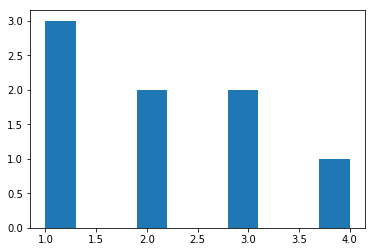

In [46]:
data = [1, 2, 1, 3, 3, 1, 4, 2]
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(data)

Populating the interactive namespace from numpy and matplotlib
Mean: 306.70832675342825
SD: 412.99693340852957
Max: 3564.7332644989997
Min: 0.0


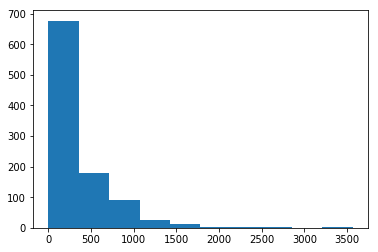

In [47]:
%pylab inline

import matplotlib.pyplot as plt
import numpy as np

def describe_data(data):
    print 'Mean:', np.mean(data)
    print 'SD:', np.std(data)
    print 'Max:', np.max(data)
    print 'Min:', np.min(data)
    plt.hist(data)

total_minutes = total_minutes_by_account.values()  
describe_data(total_minutes)

Mean: 1.636180904522613
SD: 3.0025612998294227
Max: 36
Min: 0


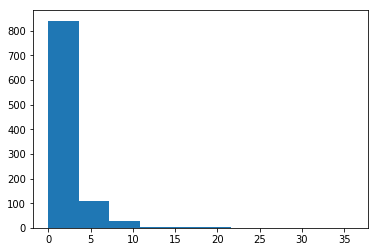

In [48]:
lessons_completed_by_account = sum_grouped_items(engagement_by_account, 'lessons_completed')
describe_data(lessons_completed_by_account.values())

Mean: 2.8673366834170855
SD: 2.2551980029196814
Max: 7
Min: 0


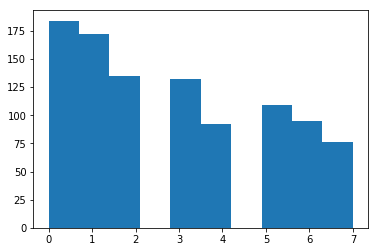

In [49]:
days_visited_by_account = sum_grouped_items(engagement_by_account, 'has_visited')
describe_data(days_visited_by_account.values())

Text(0,0.5,'Distribution of classroom visits in the first week for students who pass the subway project')

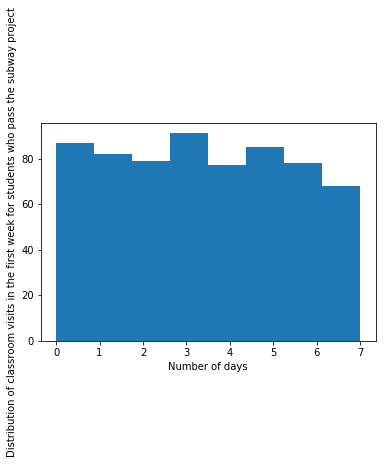

In [50]:
import seaborn as sns
plt.hist(passing_visits.values(), bins=8)
plt.xlabel('Number of days')
plt.ylabel('Distribution of classroom visits in the first week ' + 
          'for students who pass the subway project')

Text(0,0.5,'Distribution of classroom visits in the first week for students who do not pass the subway project')

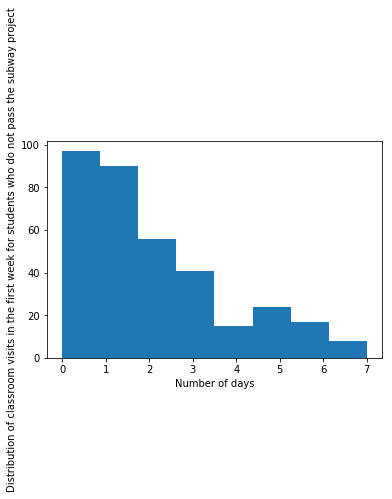

In [51]:
import seaborn as sns
plt.hist(non_passing_visits.values(), bins=8)
plt.xlabel('Number of days')
plt.ylabel('Distribution of classroom visits in the first week ' + 
          'for students who do not pass the subway project')